<a href="https://colab.research.google.com/github/beaasuncion/CCDEPLRL_EXERCISES_COM221ML/blob/main/Exercise_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

In [144]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [145]:
import numpy as np
import pandas as pd

path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"

dataset = pd.read_json(path)

In [146]:
dataset.head()

,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5


In [147]:
review = dataset['review'].tolist()
rating = dataset['rating'].tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(review) * 0.8)

training_review = review[0:training_size]
testing_review = review[training_size:]
training_rating = rating[0:training_size]
testing_rating = rating[training_size:]

# Map ratings: 3-5 → 1 (positive), 1-2 → 0 (negative)
def map_rating_to_sentiment(rating_list):
    return [1 if int(r) > 3 else 0 for r in rating_list]

training_sentiment = map_rating_to_sentiment(training_rating)
testing_sentiment = map_rating_to_sentiment(testing_rating)

training_rating_final = np.array(training_sentiment)
testing_rating_final = np.array(testing_sentiment)


## 1. Tokenize the data

In [148]:
vocab_size = 2500
embedding_dim = 16
max_length = 22
trunc_type = 'post'
padding_type = 'post'
oov_tok = ""

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_review)

# (word -> integer ID)
word_index = tokenizer.word_index


## 2. Sequence the data

In [149]:
training_sequences = tokenizer.texts_to_sequences(training_review)
testing_sequences = tokenizer.texts_to_sequences(testing_review)


## 3. Pad the data

In [150]:
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


## 4. Train a sentiment model

In [151]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.build(input_shape=(None, max_length)) # force build
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 22, 16)         │        40,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_8      │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 6)              │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,109 (156.68 KB)

 Trainable params: 40,109 (156.68 KB)

 Non-trainable params: 0 (0.00 B)

In [152]:
num_epochs = 20
history = model.fit(training_padded, training_rating_final, epochs=num_epochs, validation_data=(testing_padded, testing_rating_final))

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.5507 - loss: 0.6909 - val_accuracy: 0.2139 - val_loss: 0.7137
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5809 - loss: 0.6825 - val_accuracy: 0.2139 - val_loss: 0.7276
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5655 - loss: 0.6758 - val_accuracy: 0.2139 - val_loss: 0.7300
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5589 - loss: 0.6699 - val_accuracy: 0.2139 - val_loss: 0.7349
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5821 - loss: 0.6514 - val_accuracy: 0.2139 - val_loss: 0.7364
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6143 - loss: 0.6399 - val_accuracy: 0.2289 - val_loss: 0.7327
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6768 - loss: 0.6126 - val_accuracy: 0.2637 - val_loss: 0.7343
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6998 - loss: 0.5874 - val_accuracy: 0.3284 - val_loss

## Get files for visualing the network

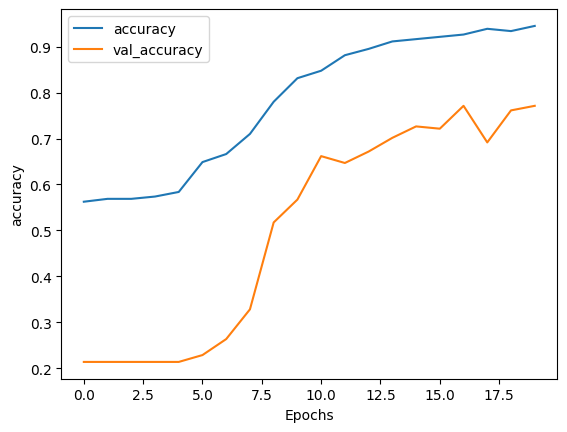

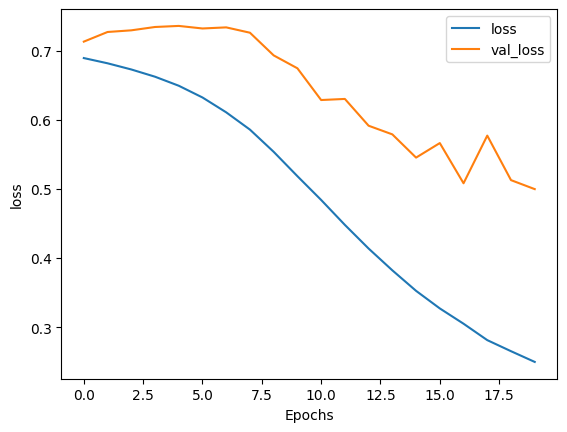

In [153]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [154]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(2500, 16)


In [155]:
import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index.get(word_num, "")  # safer with get
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [156]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [157]:
print("Number of embeddings:", len(weights))       # Should be vocab_size
print("Number of words in metadata:", len(word_index))  # May be less than vocab_size

Number of embeddings: 2500
Number of words in metadata: 3131


## 5. Predict sentiment with new reviews

In [163]:
# Example new reviews (Taglish style) for delivery of clothes/shoes
fake_reviews = [
    "Sobrang bilis ng delivery, thank you!",
    "Medyo late yung sapatos na dumating",
    "Not happy sa quality ng tshirt, manipis",
    "Hindi gumana yung zipper ng jacket",
    "sakto lang",
    "ang panget ng product na to hayop!",
    "This is a fantastic product! I love it.",
    "It was okay, nothing special.",
    "Best movie I've seen in a long time.",
    "I regret buying this.",
    "I love the product potangina. The best products by this seller. Well ang condition and mabait ang driver",
    "ang panget ng product na to hayop!",
    "Maganda ang pangit",
    "Bagsak ang pasado",
    "Pasado ang bagsak",
    "Sexy ang mataba",
    "Matalino ang tanga"

]

for i, review in enumerate(fake_reviews):
    score = classes[i][0]
    sentiment = "Positive" if score > 0.5 else "Negative"
    print(f"Review: {review}\nPrediction: {score:.4f} ({sentiment})\n")

Review: Sobrang bilis ng delivery, thank you!
Prediction: 0.9510 (Positive)

Review: Medyo late yung sapatos na dumating
Prediction: 0.3797 (Negative)

Review: Not happy sa quality ng tshirt, manipis
Prediction: 0.3917 (Negative)

Review: Hindi gumana yung zipper ng jacket
Prediction: 0.2214 (Negative)

Review: sakto lang
Prediction: 0.7540 (Positive)

Review: ang panget ng product na to hayop!
Prediction: 0.1579 (Negative)

Review: This is a fantastic product! I love it.
Prediction: 0.2006 (Negative)

Review: It was okay, nothing special.
Prediction: 0.2682 (Negative)

Review: Best movie I've seen in a long time.
Prediction: 0.4874 (Negative)

Review: I regret buying this.
Prediction: 0.4298 (Negative)

Review: I love the product potangina. The best products by this seller. Well ang condition and mabait ang driver
Prediction: 0.5376 (Positive)

Review: ang panget ng product na to hayop!
Prediction: 0.6377 (Positive)

Review: Maganda ang pangit
Prediction: 0.4731 (Negative)

Review: Ba